# **ANALYSIS OF STROKE DATASET**

# **EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../input/stroke/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning

In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has **201** missing values, replacing them by mode

In [8]:
df = data

In [9]:
data[20:40]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
20,70630,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,never smoked,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
28,54827,Male,69.0,0,1,Yes,Self-employed,Urban,195.23,28.3,smokes,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1


In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mode()[0])

In [11]:
df[20:40]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
20,70630,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,never smoked,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,28.7,Unknown,1
28,54827,Male,69.0,0,1,Yes,Self-employed,Urban,195.23,28.3,smokes,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,28.7,formerly smoked,1


In [12]:
#Removing id column as it is ineffective
df.drop("id",inplace=True,axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df.duplicated().sum()

0

No duplicate records

In [14]:
#Checking Summary of categorical columns
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [15]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [16]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.7,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1


In [17]:
for col in categorical:
    print('\n'+col)
    print(df[col].unique())
    print("No of Unique classes ",df[col].nunique())


gender
['male' 'female' 'other']
No of Unique classes  3

ever_married
['yes' 'no']
No of Unique classes  2

work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
No of Unique classes  5

Residence_type
['urban' 'rural']
No of Unique classes  2

smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']
No of Unique classes  4


In [18]:
df = df[df.gender != 'Other']
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.7,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1


In [19]:
df.shape

(5110, 11)

In [20]:
df.age.value_counts().iloc[-15:]

0.32    5
0.56    5
0.72    5
0.88    5
0.24    5
1.00    5
1.56    4
1.16    4
0.64    4
0.80    4
1.40    3
0.48    3
0.16    3
0.40    2
0.08    2
Name: age, dtype: int64

Let's drop rows where age < 18

In [21]:
df = df[df.age > 18]

In [22]:
df.smoking_status.value_counts()

never_smoked       1727
formerly_smoked     857
unknown             835
smokes              775
Name: smoking_status, dtype: int64

In [23]:
df.Residence_type.value_counts()

urban    2141
rural    2053
Name: Residence_type, dtype: int64

# Data Visualization

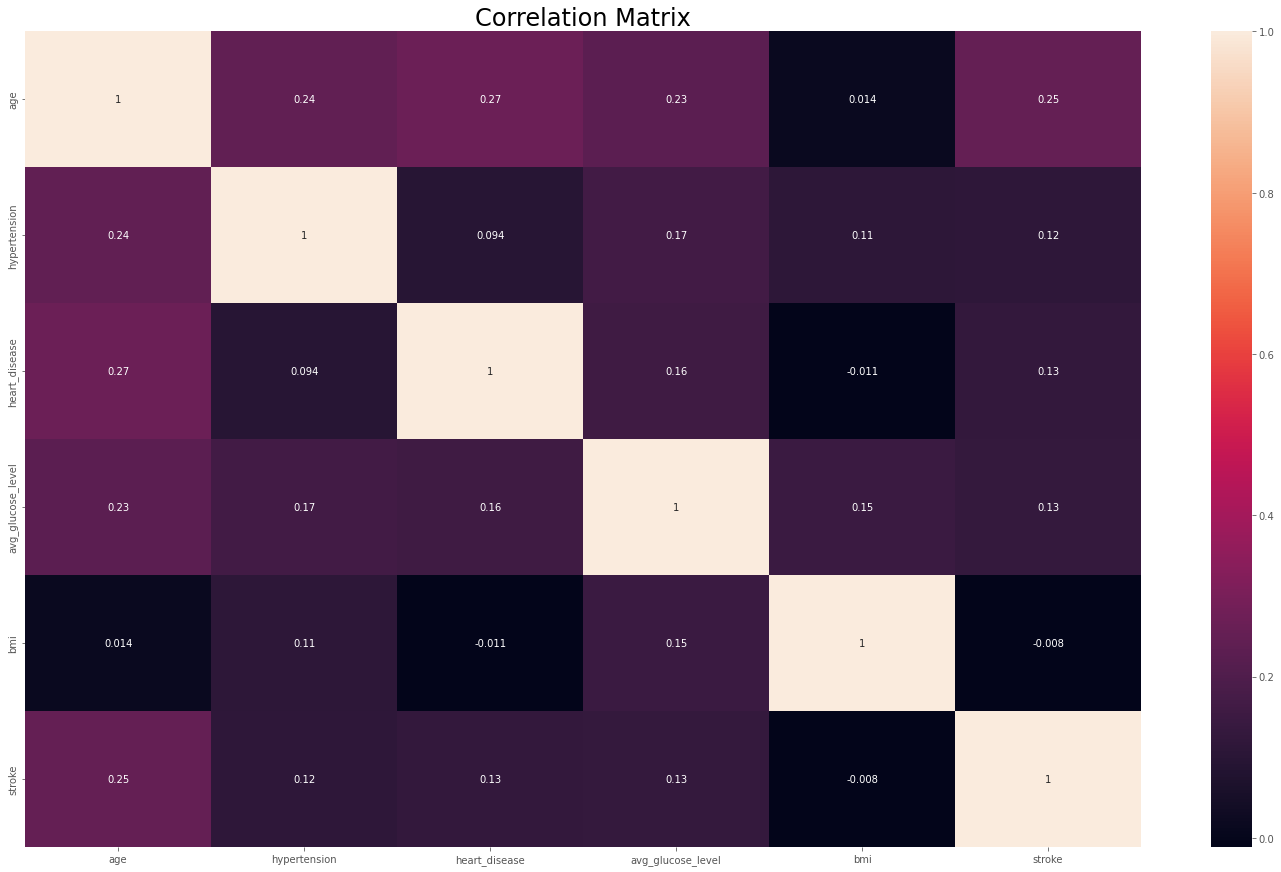

In [24]:
corr = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

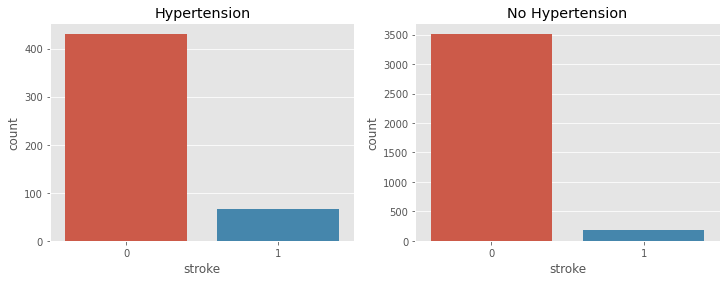

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=df[df.hypertension == 1], x='stroke').set(title = 'Hypertension')
sns.countplot(ax=ax[1], data=df[df.hypertension == 0], x='stroke').set(title = 'No Hypertension')

plt.show()

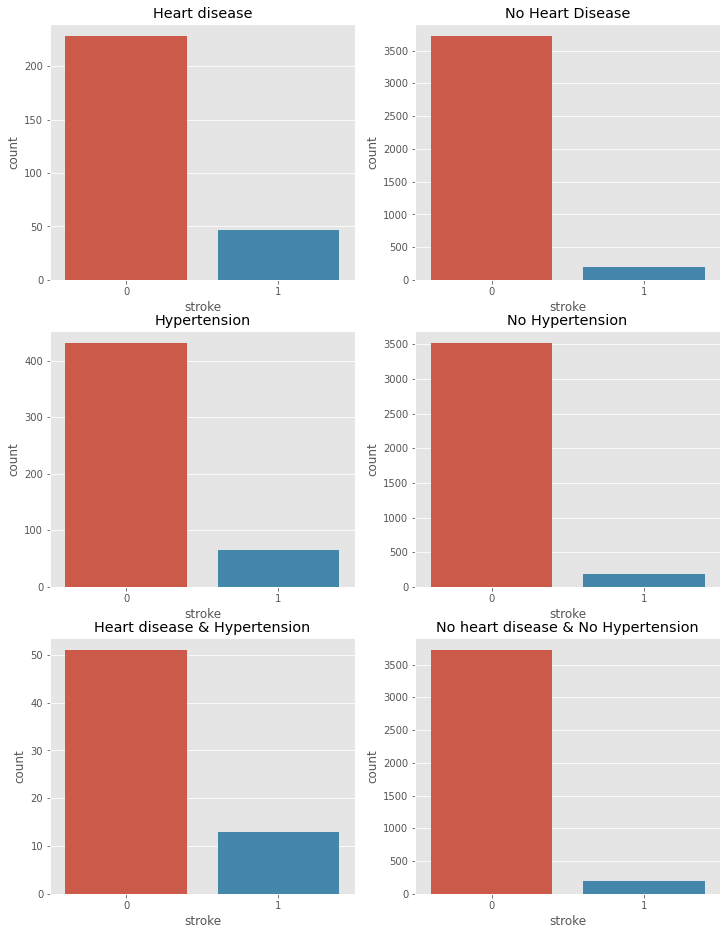

In [26]:
fig, ax = plt.subplots(3,2, figsize=(12,16))

sns.countplot(ax=ax[0,0], data=df[df.heart_disease == 1], x='stroke').set(title = 'Heart disease')
sns.countplot(ax=ax[0,1], data=df[df.heart_disease == 0], x='stroke').set(title = 'No Heart Disease')

sns.countplot(ax=ax[1,0], data=df[df.hypertension == 1], x='stroke').set(title = 'Hypertension')
sns.countplot(ax=ax[1,1], data=df[df.hypertension == 0], x='stroke').set(title = 'No Hypertension')

sns.countplot(ax=ax[2,0], data=df[(df.heart_disease == 1) & (df.hypertension == 1)], x='stroke').set(title = 'Heart disease & Hypertension')
sns.countplot(ax=ax[2,1], data=df[df.heart_disease == 0 & (df.hypertension == 0)], x='stroke').set(title = 'No heart disease & No Hypertension')

plt.show()

VISUALING RESIDENCE

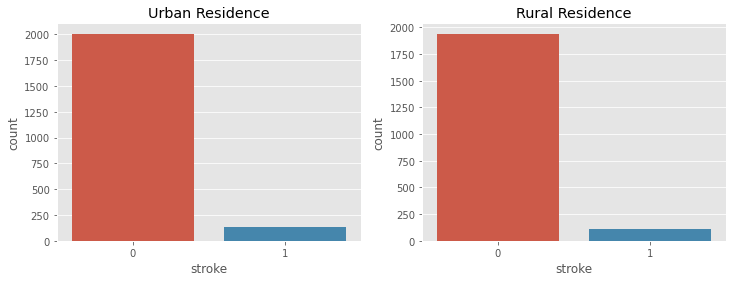

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=df[df.Residence_type == 'urban'], x='stroke').set(title = 'Urban Residence')
sns.countplot(ax=ax[1], data=df[df.Residence_type == 'rural'], x='stroke').set(title = 'Rural Residence')

plt.show()

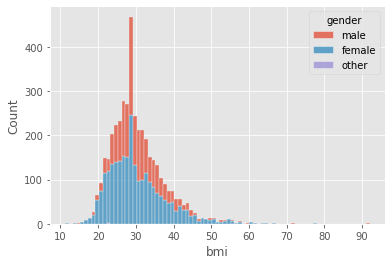

In [28]:
sns.histplot(data=df, x='bmi', hue='gender', multiple='stack')
plt.show()

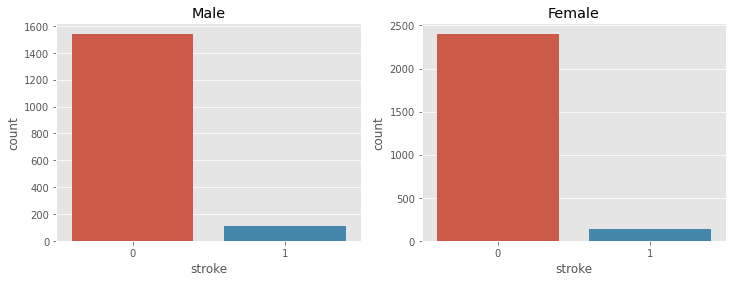

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=df[df.gender == 'male'], x='stroke').set(title = 'Male')
sns.countplot(ax=ax[1], data=df[df.gender == 'female'], x='stroke').set(title = 'Female')

plt.show()

In [30]:
print(df[df.gender == 'male'].stroke.value_counts())
print(df[df.gender == 'female'].stroke.value_counts())

0    1542
1     108
Name: stroke, dtype: int64
0    2404
1     139
Name: stroke, dtype: int64


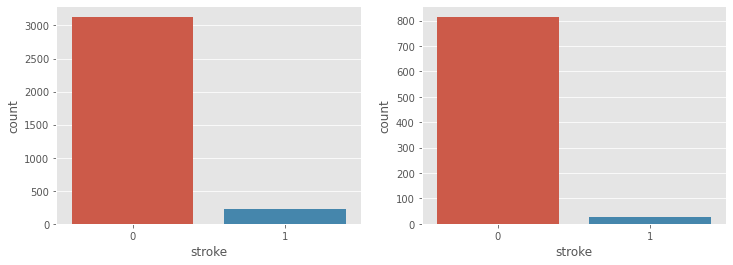

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=df[df.ever_married == 'yes'], x='stroke')
sns.countplot(ax=ax[1], data=df[df.ever_married == 'no'], x='stroke')

plt.show()

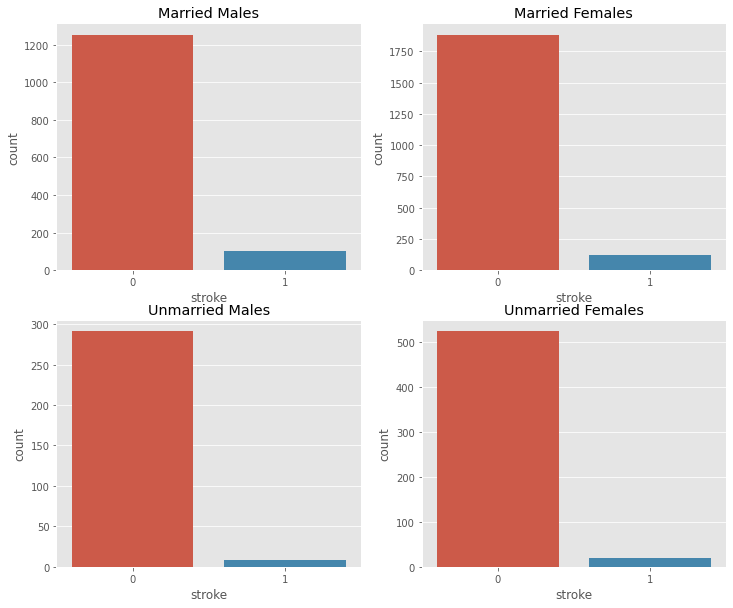

In [32]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.countplot(ax=ax[0,0], data=df[(df.ever_married == 'yes') & (df.gender == 'male')],
              x='stroke').set(title='Married Males')
sns.countplot(ax=ax[0,1], data=df[(df.ever_married == 'yes') & (df.gender == 'female')],
              x='stroke').set(title='Married Females')
sns.countplot(ax=ax[1,0], data=df[(df.ever_married == 'no') & (df.gender == 'male')],
              x='stroke').set(title='Unmarried Males')
sns.countplot(ax=ax[1,1], data=df[(df.ever_married == 'no') & (df.gender == 'female')],
              x='stroke').set(title='Unmarried Females')
plt.show()

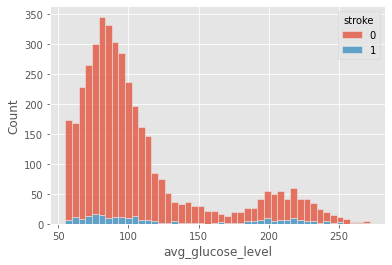

In [33]:
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', multiple='stack')

plt.show()

People having stroke tends to have a **higher** average blood glucose level

# Data Preprocessing for ML model

### One Hot Encoding

In [34]:
df = pd.get_dummies(
    df, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,ever_married_no,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
1,61.0,0,0,202.21,28.7,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


Correlation after one hot encoding

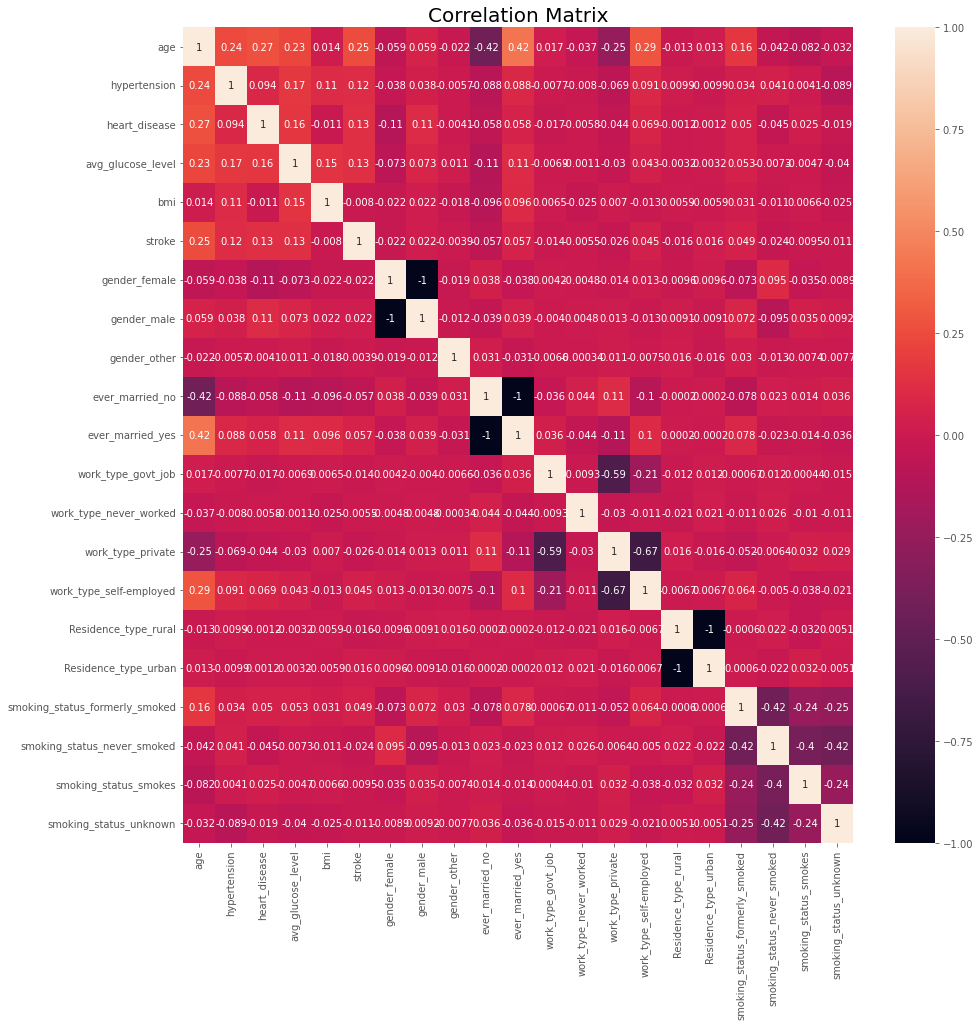

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);
plt.show()

In [36]:
df.corr()['stroke'].sort_values(ascending=False)[1:] # importance of all features

age                               0.250469
avg_glucose_level                 0.127510
heart_disease                     0.126038
hypertension                      0.115097
ever_married_yes                  0.057112
smoking_status_formerly_smoked    0.049050
work_type_self-employed           0.045410
gender_male                       0.022444
Residence_type_urban              0.016023
gender_other                     -0.003863
work_type_never_worked           -0.005464
bmi                              -0.008029
smoking_status_smokes            -0.009505
smoking_status_unknown           -0.010592
work_type_govt_job               -0.014468
Residence_type_rural             -0.016023
gender_female                    -0.022319
smoking_status_never_smoked      -0.024096
work_type_private                -0.026321
ever_married_no                  -0.057112
Name: stroke, dtype: float64

In [37]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_female', 'gender_male', 'gender_other',
       'ever_married_no', 'ever_married_yes', 'work_type_govt_job',
       'work_type_never_worked', 'work_type_private',
       'work_type_self-employed', 'Residence_type_rural',
       'Residence_type_urban', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes',
       'smoking_status_unknown'],
      dtype='object')

In [38]:
features = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_female', 'gender_male',
       'ever_married_no', 'ever_married_yes', 'work_type_govt_job',
       'work_type_never_worked', 'work_type_private',
       'work_type_self-employed', 'Residence_type_rural',
       'Residence_type_urban', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes']]

y = df[['stroke']]

Scaling Features

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(features,y,test_size = 0.2,random_state =2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train.shape

(3355, 18)

In [41]:
X_test.shape

(839, 18)

In [42]:
y_test.shape

(839, 1)

# **DEFINING MODELS**

In [43]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM-Linear', SVC(kernel="linear", C=1.0)))
models.append(('SVM-RBF',SVC(kernel="rbf",gamma=0.7, C=1.0)))
models.append(('SVM-Poly deg 3',SVC(kernel="poly",degree = 3 ,gamma="auto", C=1.0)))


In [44]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier()

In [45]:
models.append(('Ensemble Learning',
               StackingClassifier(
                   estimators=[('logistics_regression', lr),  ('decision_tree', dt)], 
                   final_estimator= rf)
              ))

In [46]:
#  models.append(('Ensemble Learning',VotingClassifier(
#     estimators=[('logistics_regression', lr), ('random_forest', rf), ('decision_tree', dt)],
#     voting='soft')
#               ))

# **TRAINING MODELS**

In [47]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

results = []  # accuracy
CM = []
names = []
scoring = 'accuracy'
seed = 5

# Defining model_performance as a DataFrame to store evaluation metrics

model_performance = pd.DataFrame(columns=['Classifiers', 'fpr','tpr','auc','Accuracy','Precision','Recall','F1-Score'])

for name, model in models:
    
    mod = model.fit(X_train_scaled, y_train.values.ravel())
    y_pred = mod.predict(X_test_scaled)

    CM.append([name, metrics.confusion_matrix(y_test, y_pred)])   # maintaining list of confusion matrix for each model
    
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=kfold, scoring=scoring)
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)

    model_performance = model_performance.append({'Classifiers':name,
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc,
                    'Accuracy':cv_results.mean(),
                    'Precision': precision_score(y_test, y_pred),
                    'Recall': recall_score(y_test, y_pred),
                    'F1-Score': f1_score(y_test, y_pred)}, ignore_index=True)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Set name of the classifiers as index labels
model_performance.set_index('Classifiers', inplace=True)

KNN: 0.943964 (0.009547)
NB: 0.441729 (0.213723)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM-Linear: 0.943070 (0.008504)
SVM-RBF: 0.943666 (0.009011)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM-Poly deg 3: 0.943070 (0.008504)
Ensemble Learning: 0.898659 (0.003651)


# **EVALUATING MODELS**

# Comparision on the basis of accuracy

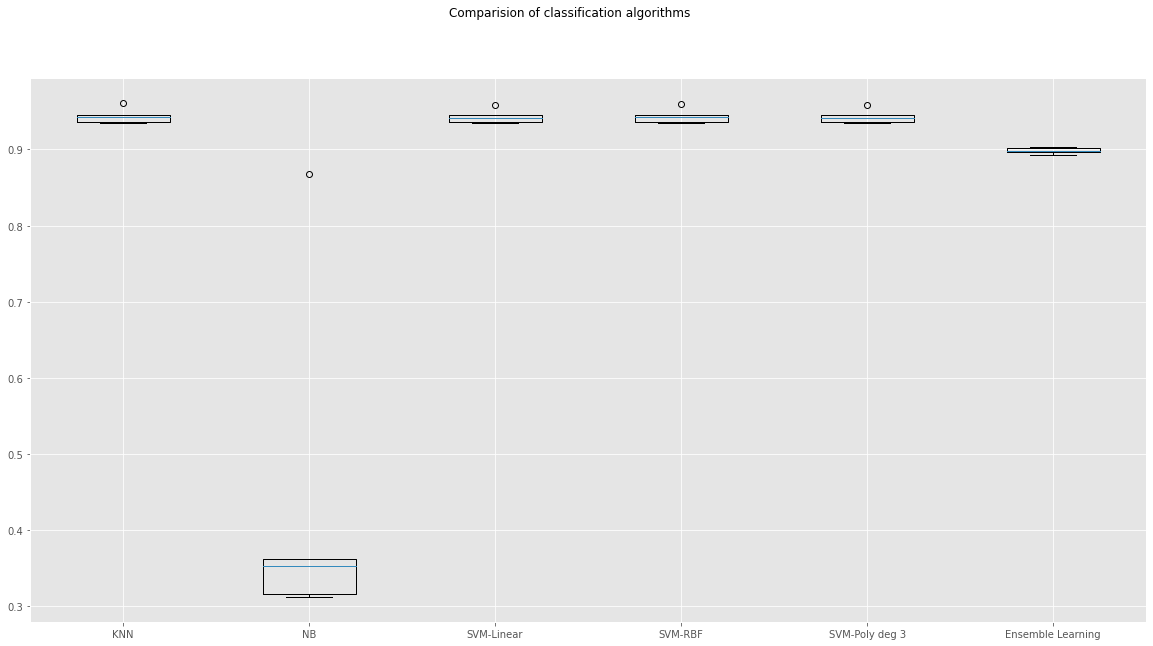

In [48]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparision of classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Confusion Matrix

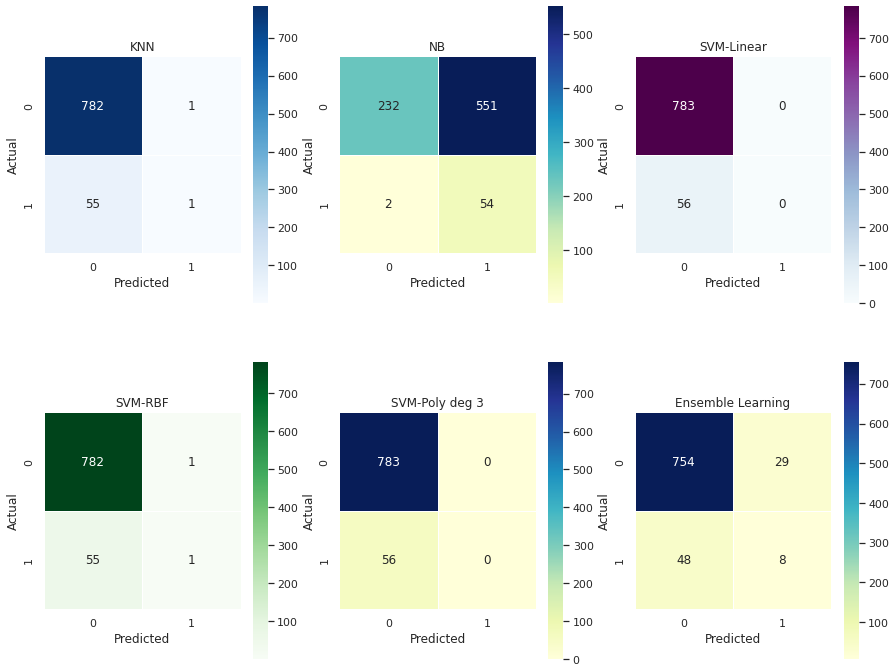

In [49]:
sns.set()

fig, axs = plt.subplots(2, 3, figsize=(15,12))
sns.heatmap(CM[0][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', ax = axs[0,0]);
axs[0, 0].set_title(CM[0][0])
sns.heatmap(CM[1][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu',ax = axs[0,1]);
axs[0, 1].set_title(CM[1][0])
sns.heatmap(CM[2][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu',ax = axs[0,2]);
axs[0, 2].set_title(CM[2][0])
sns.heatmap(CM[3][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens' ,ax = axs[1,0]);
axs[1, 0].set_title(CM[3][0])
sns.heatmap(CM[4][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu' ,ax = axs[1,1]);
axs[1, 1].set_title(CM[4][0])
sns.heatmap(CM[5][1], annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu' ,ax = axs[1,2]);
axs[1, 2].set_title(CM[5][0])


for ax in axs.flat:
    ax.set(xlabel='Predicted', ylabel='Actual')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# ROC_AUC CURVE ANALYSIS

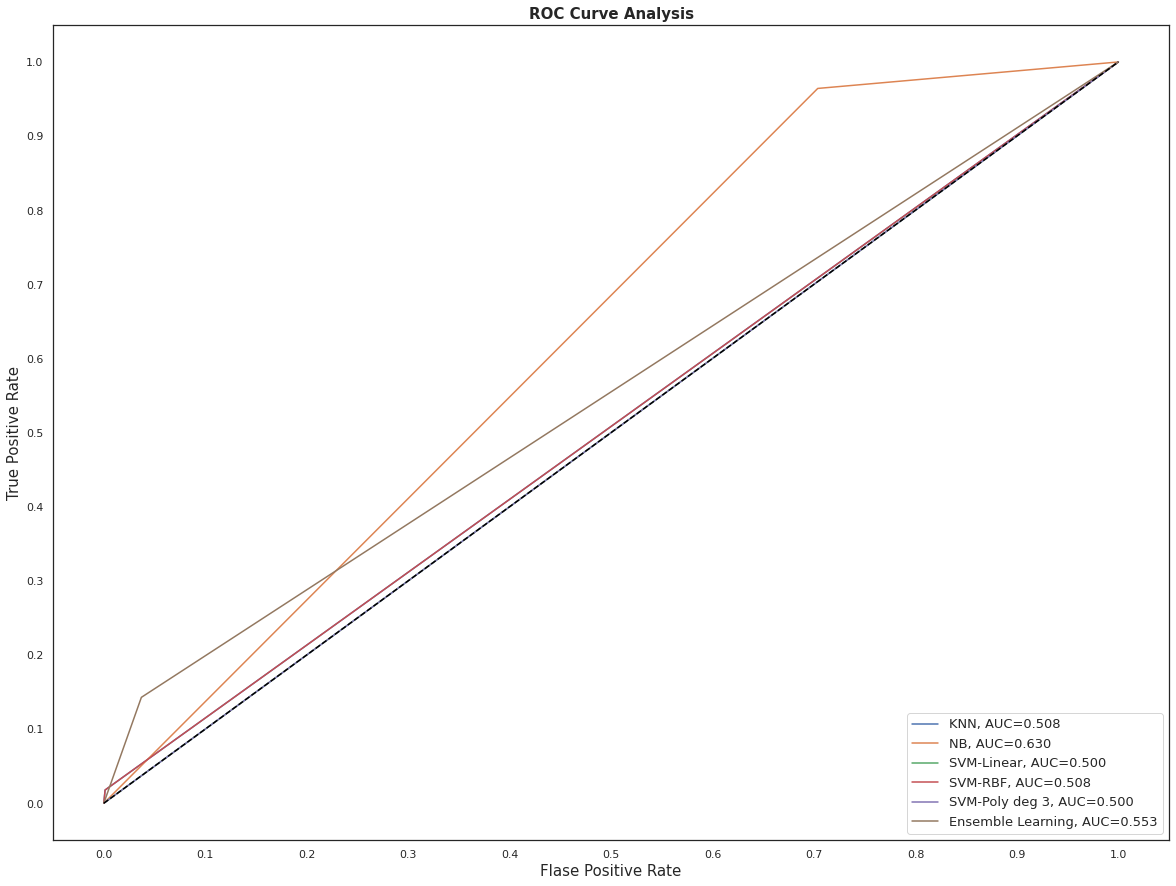

In [50]:
import numpy as np

model_performance['auc']= round(model_performance['auc'],3)

sns.set_theme(style = 'white')

fig = plt.figure(figsize=(20,15))

for i in model_performance.index:
    plt.plot(model_performance.loc[i]['fpr'], 
             model_performance.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, model_performance.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [51]:
performance = model_performance.reset_index()
performance = performance[['Classifiers','auc','Accuracy','Precision','Recall','F1-Score']]

In [52]:
performance

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
0,KNN,0.508,0.943964,0.500000,0.017857,0.034483
1,NB,0.630,0.441729,0.089256,0.964286,0.163389
2,SVM-Linear,0.500,0.943070,0.000000,0.000000,0.000000
3,SVM-RBF,0.508,0.943666,0.500000,0.017857,0.034483
4,SVM-Poly deg 3,0.500,0.943070,0.000000,0.000000,0.000000
5,Ensemble Learning,0.553,0.898659,0.216216,0.142857,0.172043


In [53]:
performance['Accuracy'] = round(performance['Accuracy'],3)

In [54]:
performance.sort_values('Accuracy',ascending = False).head()

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
0,KNN,0.508,0.944,0.500000,0.017857,0.034483
3,SVM-RBF,0.508,0.944,0.500000,0.017857,0.034483
2,SVM-Linear,0.500,0.943,0.000000,0.000000,0.000000
4,SVM-Poly deg 3,0.500,0.943,0.000000,0.000000,0.000000
5,Ensemble Learning,0.553,0.899,0.216216,0.142857,0.172043


In [55]:
performance.sort_values(['auc','Accuracy'],ascending = False).head()

,Classifiers,auc,Accuracy,Precision,Recall,F1-Score
1,NB,0.630,0.442,0.089256,0.964286,0.163389
5,Ensemble Learning,0.553,0.899,0.216216,0.142857,0.172043
0,KNN,0.508,0.944,0.500000,0.017857,0.034483
3,SVM-RBF,0.508,0.944,0.500000,0.017857,0.034483
2,SVM-Linear,0.500,0.943,0.000000,0.000000,0.000000


# Evaluating Models using different Metrics

<AxesSubplot:title={'center':'Classifiers Performance'}, xlabel='Classifiers'>

<Figure size 432x288 with 0 Axes>

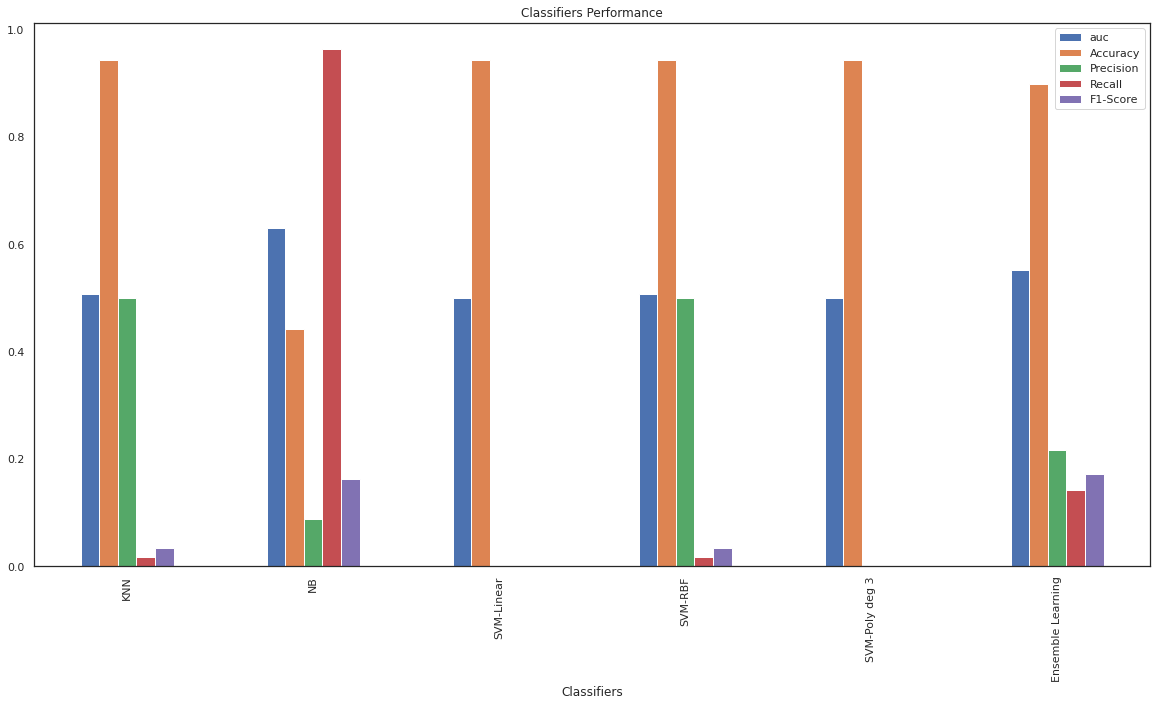

In [56]:
plt.figure()
plt.rcParams.update({'font.size': 22}) 

performance.plot(x='Classifiers',
        kind='bar',
        stacked=False,
        title='Classifiers Performance',
        figsize = (20,10))

# **CONCLUSION**

#### Accuracy score is misleading; both SVM and KNN trained with high accuracy but when evaluated using precision, recall, F1-score and AUC didn't perform well. 

#### KNN and SVM both having AUC 0.5 it means that both are predicting randomly. So none of both is good.